The first step is to create a list of all players and create the unique key value that will be used within the URL

In [ ]:
player= (Giannis atattetetet : 'a/antetgi01', Lebron James:'j/jamesle01')

Once we have a full list of all applicable players, the next steps is to create loop that pulls the game by game data and appends to a dataset.  To loop through basketball reference, we will need to insert the unique player ID into the URL, gather data and then move to the next player until all player data are collected.  Below is an example of how the code will operate for a single player.

In [91]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
import numpy as np

url = 'https://www.basketball-reference.com/players/j/jamesle01/gamelog/2021'
df_list = pd.read_html(url)
lebron_season=df_list[7]
lebron_season.head()
lebron_season['PTS'] = pd.to_numeric(lebron_season['PTS'], errors='coerce')

lebron_season = lebron_season.replace(np.nan, 0, regex=True)
#lebron_season.dtypes
lebron_season

,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2020-12-22,35-358,LAL,0,LAC,L (-7),1,28:21,...,3,5,5,0,0,4,2,22.0,13.1,+2
1,2,2,2020-12-25,35-361,LAL,0,DAL,W (+23),1,31:24,...,6,7,10,1,0,4,0,22.0,18.7,+16
2,3,3,2020-12-27,35-363,LAL,0,MIN,W (+36),1,26:12,...,9,9,5,1,0,4,1,18.0,13.3,+16
3,4,4,2020-12-28,35-364,LAL,0,POR,L (-8),1,35:55,...,7,9,6,2,1,3,2,29.0,25.6,0
4,5,5,2020-12-30,36-000,LAL,@,SAS,W (+14),1,35:13,...,5,5,8,1,1,2,1,26.0,19.9,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,68,0,2021-05-09,36-130,LAL,0,PHO,W (+13),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,0.0,Inactive,Inactive
71,69,0,2021-05-11,36-132,LAL,0,NYK,W (+2),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,0.0,Inactive,Inactive
72,70,0,2021-05-12,36-133,LAL,0,HOU,W (+2),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,0.0,Inactive,Inactive
73,71,44,2021-05-15,36-136,LAL,@,IND,W (+7),1,28:27,...,4,7,8,0,0,4,2,24.0,16.7,+7


In [2]:
lebron10=lebron_season.drop(columns=['Unnamed: 5', 'Unnamed: 7'])

In [3]:
lebron10.dtypes

Rk       object
G        object
Date     object
Age      object
Tm       object
Opp      object
GS       object
MP       object
FG       object
FGA      object
FG%      object
3P       object
3PA      object
3P%      object
FT       object
FTA      object
FT%      object
ORB      object
DRB      object
TRB      object
AST      object
STL      object
BLK      object
TOV      object
PF       object
PTS     float64
GmSc     object
+/-      object
dtype: object

In [4]:
for col in lebron10.columns[8:]:
    7
    #make numeric
    

In [92]:
#lebron_season2=lebron_season[lebron_season['PTS']>=0]
#lebron_season2.head(100)
lebron10.dtypes
lebron10

,Rk,G,Date,Age,Tm,Opp,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2020-12-22,35-358,LAL,LAC,1,28:21,7.0,17.0,...,3.0,5.0,5.0,0.0,0.0,4.0,2.0,22.0,13.1,2.0
1,2,2,2020-12-25,35-361,LAL,DAL,1,31:24,8.0,18.0,...,6.0,7.0,10.0,1.0,0.0,4.0,0.0,22.0,18.7,16.0
2,3,3,2020-12-27,35-363,LAL,MIN,1,26:12,6.0,13.0,...,9.0,9.0,5.0,1.0,0.0,4.0,1.0,18.0,13.3,16.0
3,4,4,2020-12-28,35-364,LAL,POR,1,35:55,11.0,20.0,...,7.0,9.0,6.0,2.0,1.0,3.0,2.0,29.0,25.6,0.0
4,5,5,2020-12-30,36-000,LAL,SAS,1,35:13,11.0,23.0,...,5.0,5.0,8.0,1.0,1.0,2.0,1.0,26.0,19.9,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,68,0,2021-05-09,36-130,LAL,PHO,Inactive,Inactive,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
71,69,0,2021-05-11,36-132,LAL,NYK,Inactive,Inactive,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
72,70,0,2021-05-12,36-133,LAL,HOU,Inactive,Inactive,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
73,71,44,2021-05-15,36-136,LAL,IND,1,28:27,11.0,22.0,...,4.0,7.0,8.0,0.0,0.0,4.0,2.0,24.0,16.7,7.0


We will need to remove all lines that have inactive as values since we are most interested in seeing player standard deviations and means.

In [93]:
lebron10.dtypes


Rk       object
G        object
Date     object
Age      object
Tm       object
Opp      object
GS       object
MP       object
FG      float64
FGA     float64
FG%     float64
3P      float64
3PA     float64
3P%     float64
FT      float64
FTA     float64
FT%     float64
ORB     float64
DRB     float64
TRB     float64
AST     float64
STL     float64
BLK     float64
TOV     float64
PF      float64
PTS     float64
GmSc    float64
+/-     float64
dtype: object

In [ ]:
# 

We need to add a column that will be labeled Draftkings points.  The scoring methodology will need to be included so that each game line has an accurate draftkings score per game.  If historical cost data is available that should be included also.

In [6]:
lebron3=lebron10[lebron10["GS"].str.contains("Inactive")==False]


In [7]:
lebron3
#lebron_season[lebron_season["Rk"].str.contains("Rk")==False]

,Rk,G,Date,Age,Tm,Opp,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2020-12-22,35-358,LAL,LAC,1,28:21,7.0,17.0,...,3.0,5.0,5.0,0.0,0.0,4.0,2.0,22.0,13.1,2.0
1,2,2,2020-12-25,35-361,LAL,DAL,1,31:24,8.0,18.0,...,6.0,7.0,10.0,1.0,0.0,4.0,0.0,22.0,18.7,16.0
2,3,3,2020-12-27,35-363,LAL,MIN,1,26:12,6.0,13.0,...,9.0,9.0,5.0,1.0,0.0,4.0,1.0,18.0,13.3,16.0
3,4,4,2020-12-28,35-364,LAL,POR,1,35:55,11.0,20.0,...,7.0,9.0,6.0,2.0,1.0,3.0,2.0,29.0,25.6,0.0
4,5,5,2020-12-30,36-000,LAL,SAS,1,35:13,11.0,23.0,...,5.0,5.0,8.0,1.0,1.0,2.0,1.0,26.0,19.9,-1.0
5,6,6,2021-01-01,36-002,LAL,SAS,1,35:41,8.0,22.0,...,10.0,11.0,10.0,2.0,0.0,4.0,0.0,26.0,22.5,18.0
6,7,7,2021-01-03,36-004,LAL,MEM,1,32:00,9.0,16.0,...,13.0,13.0,8.0,1.0,0.0,2.0,2.0,22.0,21.3,19.0
7,8,8,2021-01-05,36-006,LAL,MEM,1,34:05,11.0,20.0,...,10.0,12.0,7.0,1.0,1.0,6.0,0.0,26.0,21.4,20.0
8,9,9,2021-01-07,36-008,LAL,SAS,1,34:54,8.0,15.0,...,6.0,6.0,12.0,0.0,0.0,4.0,3.0,27.0,23.1,-10.0
9,10,10,2021-01-08,36-009,LAL,CHI,1,34:09,11.0,21.0,...,7.0,7.0,7.0,0.0,0.0,4.0,1.0,28.0,19.5,9.0


In [8]:
lebron4=lebron3[lebron3["Rk"].str.contains("Rk")==False]

In [9]:
lebron4

,Rk,G,Date,Age,Tm,Opp,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,2020-12-22,35-358,LAL,LAC,1,28:21,7.0,17.0,...,3.0,5.0,5.0,0.0,0.0,4.0,2.0,22.0,13.1,2.0
1,2,2,2020-12-25,35-361,LAL,DAL,1,31:24,8.0,18.0,...,6.0,7.0,10.0,1.0,0.0,4.0,0.0,22.0,18.7,16.0
2,3,3,2020-12-27,35-363,LAL,MIN,1,26:12,6.0,13.0,...,9.0,9.0,5.0,1.0,0.0,4.0,1.0,18.0,13.3,16.0
3,4,4,2020-12-28,35-364,LAL,POR,1,35:55,11.0,20.0,...,7.0,9.0,6.0,2.0,1.0,3.0,2.0,29.0,25.6,0.0
4,5,5,2020-12-30,36-000,LAL,SAS,1,35:13,11.0,23.0,...,5.0,5.0,8.0,1.0,1.0,2.0,1.0,26.0,19.9,-1.0
5,6,6,2021-01-01,36-002,LAL,SAS,1,35:41,8.0,22.0,...,10.0,11.0,10.0,2.0,0.0,4.0,0.0,26.0,22.5,18.0
6,7,7,2021-01-03,36-004,LAL,MEM,1,32:00,9.0,16.0,...,13.0,13.0,8.0,1.0,0.0,2.0,2.0,22.0,21.3,19.0
7,8,8,2021-01-05,36-006,LAL,MEM,1,34:05,11.0,20.0,...,10.0,12.0,7.0,1.0,1.0,6.0,0.0,26.0,21.4,20.0
8,9,9,2021-01-07,36-008,LAL,SAS,1,34:54,8.0,15.0,...,6.0,6.0,12.0,0.0,0.0,4.0,3.0,27.0,23.1,-10.0
9,10,10,2021-01-08,36-009,LAL,CHI,1,34:09,11.0,21.0,...,7.0,7.0,7.0,0.0,0.0,4.0,1.0,28.0,19.5,9.0


In [10]:
lebron4.dtypes

Rk       object
G        object
Date     object
Age      object
Tm       object
Opp      object
GS       object
MP       object
FG      float64
FGA     float64
FG%     float64
3P      float64
3PA     float64
3P%     float64
FT      float64
FTA     float64
FT%     float64
ORB     float64
DRB     float64
TRB     float64
AST     float64
STL     float64
BLK     float64
TOV     float64
PF      float64
PTS     float64
GmSc    float64
+/-     float64
dtype: object

We need to add a column that will be labeled Draftkings points. The scoring methodology will need to be included so that each game line has an accurate draftkings score per game. If historical cost data is available that should be included also.  Since draftkings awards points for double doubles and triple doubles this slightly complicates things but we will still be able to calculate the DK point totals for each game

# DraftKings Scoring Structure


Point
+1 Pt


Made 3pt Shot
+0.5 Pts


Rebound
+1.25 Pts


Assist
+1.5 Pts


Steal
+2 Pts

Block
+2 Pts

Turnover
-0.5 Pts

Double-Double
{Max 1 Per Player: Points, Rebounds, Assists, Blocks, Steals}
+1.5 Pts

Triple-Double
{Max 1 Per Player: Points, Rebounds, Assists, Blocks, Steals}
+3 Pts

In [11]:
pd.set_option('mode.chained_assignment', None)

First let's get a point total without doubledouble/triple double included

In [12]:
lebron4["summation"]=(lebron4['PTS']+lebron4['3P']*0.5+lebron4['TRB']*1.25+lebron4['AST']*1.5+lebron4['STL']*2 +lebron4['BLK']*2-lebron4['TOV']*0.5)

In [13]:
lebron4

,Rk,G,Date,Age,Tm,Opp,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,summation
0,1,1,2020-12-22,35-358,LAL,LAC,1,28:21,7.0,17.0,...,5.0,5.0,0.0,0.0,4.0,2.0,22.0,13.1,2.0,35.25
1,2,2,2020-12-25,35-361,LAL,DAL,1,31:24,8.0,18.0,...,7.0,10.0,1.0,0.0,4.0,0.0,22.0,18.7,16.0,47.25
2,3,3,2020-12-27,35-363,LAL,MIN,1,26:12,6.0,13.0,...,9.0,5.0,1.0,0.0,4.0,1.0,18.0,13.3,16.0,37.25
3,4,4,2020-12-28,35-364,LAL,POR,1,35:55,11.0,20.0,...,9.0,6.0,2.0,1.0,3.0,2.0,29.0,25.6,0.0,55.25
4,5,5,2020-12-30,36-000,LAL,SAS,1,35:13,11.0,23.0,...,5.0,8.0,1.0,1.0,2.0,1.0,26.0,19.9,-1.0,47.75
5,6,6,2021-01-01,36-002,LAL,SAS,1,35:41,8.0,22.0,...,11.0,10.0,2.0,0.0,4.0,0.0,26.0,22.5,18.0,58.25
6,7,7,2021-01-03,36-004,LAL,MEM,1,32:00,9.0,16.0,...,13.0,8.0,1.0,0.0,2.0,2.0,22.0,21.3,19.0,52.75
7,8,8,2021-01-05,36-006,LAL,MEM,1,34:05,11.0,20.0,...,12.0,7.0,1.0,1.0,6.0,0.0,26.0,21.4,20.0,53.00
8,9,9,2021-01-07,36-008,LAL,SAS,1,34:54,8.0,15.0,...,6.0,12.0,0.0,0.0,4.0,3.0,27.0,23.1,-10.0,52.50
9,10,10,2021-01-08,36-009,LAL,CHI,1,34:09,11.0,21.0,...,7.0,7.0,0.0,0.0,4.0,1.0,28.0,19.5,9.0,45.25


Below, the 1 and 0 values are in place of True/False values.  We could have used true or false but wanted to keep numbers in the table

In [14]:
lebron4['DoubleDigitPoints'] = np.where(lebron4['PTS']>=10, 1, 0)
lebron4

,Rk,G,Date,Age,Tm,Opp,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-,summation,DoubleDigitPoints
0,1,1,2020-12-22,35-358,LAL,LAC,1,28:21,7.0,17.0,...,5.0,0.0,0.0,4.0,2.0,22.0,13.1,2.0,35.25,1
1,2,2,2020-12-25,35-361,LAL,DAL,1,31:24,8.0,18.0,...,10.0,1.0,0.0,4.0,0.0,22.0,18.7,16.0,47.25,1
2,3,3,2020-12-27,35-363,LAL,MIN,1,26:12,6.0,13.0,...,5.0,1.0,0.0,4.0,1.0,18.0,13.3,16.0,37.25,1
3,4,4,2020-12-28,35-364,LAL,POR,1,35:55,11.0,20.0,...,6.0,2.0,1.0,3.0,2.0,29.0,25.6,0.0,55.25,1
4,5,5,2020-12-30,36-000,LAL,SAS,1,35:13,11.0,23.0,...,8.0,1.0,1.0,2.0,1.0,26.0,19.9,-1.0,47.75,1
5,6,6,2021-01-01,36-002,LAL,SAS,1,35:41,8.0,22.0,...,10.0,2.0,0.0,4.0,0.0,26.0,22.5,18.0,58.25,1
6,7,7,2021-01-03,36-004,LAL,MEM,1,32:00,9.0,16.0,...,8.0,1.0,0.0,2.0,2.0,22.0,21.3,19.0,52.75,1
7,8,8,2021-01-05,36-006,LAL,MEM,1,34:05,11.0,20.0,...,7.0,1.0,1.0,6.0,0.0,26.0,21.4,20.0,53.00,1
8,9,9,2021-01-07,36-008,LAL,SAS,1,34:54,8.0,15.0,...,12.0,0.0,0.0,4.0,3.0,27.0,23.1,-10.0,52.50,1
9,10,10,2021-01-08,36-009,LAL,CHI,1,34:09,11.0,21.0,...,7.0,0.0,0.0,4.0,1.0,28.0,19.5,9.0,45.25,1


In [15]:
lebron4['DoubleDigitAssists'] = np.where(lebron4['AST']>=10, 1, 0)

In [16]:
lebron4['DoubleDigitRebounds'] = np.where(lebron4['TRB']>=10, 1, 0)

In [17]:
lebron4['DoubleDigitSteals'] = np.where(lebron4['STL']>=10, 1, 0)

In [18]:
lebron4['DoubleDigitBlocks'] = np.where(lebron4['BLK']>=10, 1, 0)
lebron4

,Rk,G,Date,Age,Tm,Opp,GS,MP,FG,FGA,...,PF,PTS,GmSc,+/-,summation,DoubleDigitPoints,DoubleDigitAssists,DoubleDigitRebounds,DoubleDigitSteals,DoubleDigitBlocks
0,1,1,2020-12-22,35-358,LAL,LAC,1,28:21,7.0,17.0,...,2.0,22.0,13.1,2.0,35.25,1,0,0,0,0
1,2,2,2020-12-25,35-361,LAL,DAL,1,31:24,8.0,18.0,...,0.0,22.0,18.7,16.0,47.25,1,1,0,0,0
2,3,3,2020-12-27,35-363,LAL,MIN,1,26:12,6.0,13.0,...,1.0,18.0,13.3,16.0,37.25,1,0,0,0,0
3,4,4,2020-12-28,35-364,LAL,POR,1,35:55,11.0,20.0,...,2.0,29.0,25.6,0.0,55.25,1,0,0,0,0
4,5,5,2020-12-30,36-000,LAL,SAS,1,35:13,11.0,23.0,...,1.0,26.0,19.9,-1.0,47.75,1,0,0,0,0
5,6,6,2021-01-01,36-002,LAL,SAS,1,35:41,8.0,22.0,...,0.0,26.0,22.5,18.0,58.25,1,1,1,0,0
6,7,7,2021-01-03,36-004,LAL,MEM,1,32:00,9.0,16.0,...,2.0,22.0,21.3,19.0,52.75,1,0,1,0,0
7,8,8,2021-01-05,36-006,LAL,MEM,1,34:05,11.0,20.0,...,0.0,26.0,21.4,20.0,53.00,1,0,1,0,0
8,9,9,2021-01-07,36-008,LAL,SAS,1,34:54,8.0,15.0,...,3.0,27.0,23.1,-10.0,52.50,1,1,0,0,0
9,10,10,2021-01-08,36-009,LAL,CHI,1,34:09,11.0,21.0,...,1.0,28.0,19.5,9.0,45.25,1,0,0,0,0


I will then add up the 1's and 0's to see if the total is 2 (double double) or 3 (triple double). Once that is confirmed, the 1 or 0 values will be  multiplied to their respective point values.  Eventtually this will be added to the point summation already established and that will become the Draftkings point total.

In [20]:
lebron4['DoubleDouble']=np.where(lebron4['DoubleDigitPoints']+
                                 lebron4['DoubleDigitAssists']+lebron4['DoubleDigitRebounds']+
                                 lebron4['DoubleDigitSteals']+lebron4['DoubleDigitBlocks']>=2, True, False)

In [24]:
lebron4['TripleDouble']=np.where(lebron4['DoubleDigitPoints']+
                                 lebron4['DoubleDigitAssists']+lebron4['DoubleDigitRebounds']+
                                 lebron4['DoubleDigitSteals']+lebron4['DoubleDigitBlocks']>=3, True, False)
lebron4

,Rk,G,Date,Age,Tm,Opp,GS,MP,FG,FGA,...,summation,DoubleDigitPoints,DoubleDigitAssists,DoubleDigitRebounds,DoubleDigitSteals,DoubleDigitBlocks,TripleDouble,DoubleDouble,DDPoints,TDPoints
0,1,1,2020-12-22,35-358,LAL,LAC,1,28:21,7.0,17.0,...,35.25,1,0,0,0,0,False,False,0.0,0
1,2,2,2020-12-25,35-361,LAL,DAL,1,31:24,8.0,18.0,...,47.25,1,1,0,0,0,False,True,1.5,0
2,3,3,2020-12-27,35-363,LAL,MIN,1,26:12,6.0,13.0,...,37.25,1,0,0,0,0,False,False,0.0,0
3,4,4,2020-12-28,35-364,LAL,POR,1,35:55,11.0,20.0,...,55.25,1,0,0,0,0,False,False,0.0,0
4,5,5,2020-12-30,36-000,LAL,SAS,1,35:13,11.0,23.0,...,47.75,1,0,0,0,0,False,False,0.0,0
5,6,6,2021-01-01,36-002,LAL,SAS,1,35:41,8.0,22.0,...,58.25,1,1,1,0,0,True,True,1.5,3
6,7,7,2021-01-03,36-004,LAL,MEM,1,32:00,9.0,16.0,...,52.75,1,0,1,0,0,False,True,1.5,0
7,8,8,2021-01-05,36-006,LAL,MEM,1,34:05,11.0,20.0,...,53.00,1,0,1,0,0,False,True,1.5,0
8,9,9,2021-01-07,36-008,LAL,SAS,1,34:54,8.0,15.0,...,52.50,1,1,0,0,0,False,True,1.5,0
9,10,10,2021-01-08,36-009,LAL,CHI,1,34:09,11.0,21.0,...,45.25,1,0,0,0,0,False,False,0.0,0


In [25]:
lebron4['DDPoints']=np.where(lebron4['DoubleDouble']==True, 1.5, 0)

In [27]:
lebron4['TDPoints']=np.where(lebron4['TripleDouble']==True, 3, 0)
lebron4

,Rk,G,Date,Age,Tm,Opp,GS,MP,FG,FGA,...,summation,DoubleDigitPoints,DoubleDigitAssists,DoubleDigitRebounds,DoubleDigitSteals,DoubleDigitBlocks,TripleDouble,DoubleDouble,DDPoints,TDPoints
0,1,1,2020-12-22,35-358,LAL,LAC,1,28:21,7.0,17.0,...,35.25,1,0,0,0,0,False,False,0.0,0
1,2,2,2020-12-25,35-361,LAL,DAL,1,31:24,8.0,18.0,...,47.25,1,1,0,0,0,False,True,1.5,0
2,3,3,2020-12-27,35-363,LAL,MIN,1,26:12,6.0,13.0,...,37.25,1,0,0,0,0,False,False,0.0,0
3,4,4,2020-12-28,35-364,LAL,POR,1,35:55,11.0,20.0,...,55.25,1,0,0,0,0,False,False,0.0,0
4,5,5,2020-12-30,36-000,LAL,SAS,1,35:13,11.0,23.0,...,47.75,1,0,0,0,0,False,False,0.0,0
5,6,6,2021-01-01,36-002,LAL,SAS,1,35:41,8.0,22.0,...,58.25,1,1,1,0,0,True,True,1.5,3
6,7,7,2021-01-03,36-004,LAL,MEM,1,32:00,9.0,16.0,...,52.75,1,0,1,0,0,False,True,1.5,0
7,8,8,2021-01-05,36-006,LAL,MEM,1,34:05,11.0,20.0,...,53.00,1,0,1,0,0,False,True,1.5,0
8,9,9,2021-01-07,36-008,LAL,SAS,1,34:54,8.0,15.0,...,52.50,1,1,0,0,0,False,True,1.5,0
9,10,10,2021-01-08,36-009,LAL,CHI,1,34:09,11.0,21.0,...,45.25,1,0,0,0,0,False,False,0.0,0


In [28]:
lebron4["DraftKingTotals"]=lebron4['summation']+lebron4['DDPoints']+lebron4['TDPoints']

In [29]:
lebron4

,Rk,G,Date,Age,Tm,Opp,GS,MP,FG,FGA,...,DoubleDigitPoints,DoubleDigitAssists,DoubleDigitRebounds,DoubleDigitSteals,DoubleDigitBlocks,TripleDouble,DoubleDouble,DDPoints,TDPoints,DraftKingTotals
0,1,1,2020-12-22,35-358,LAL,LAC,1,28:21,7.0,17.0,...,1,0,0,0,0,False,False,0.0,0,35.25
1,2,2,2020-12-25,35-361,LAL,DAL,1,31:24,8.0,18.0,...,1,1,0,0,0,False,True,1.5,0,48.75
2,3,3,2020-12-27,35-363,LAL,MIN,1,26:12,6.0,13.0,...,1,0,0,0,0,False,False,0.0,0,37.25
3,4,4,2020-12-28,35-364,LAL,POR,1,35:55,11.0,20.0,...,1,0,0,0,0,False,False,0.0,0,55.25
4,5,5,2020-12-30,36-000,LAL,SAS,1,35:13,11.0,23.0,...,1,0,0,0,0,False,False,0.0,0,47.75
5,6,6,2021-01-01,36-002,LAL,SAS,1,35:41,8.0,22.0,...,1,1,1,0,0,True,True,1.5,3,62.75
6,7,7,2021-01-03,36-004,LAL,MEM,1,32:00,9.0,16.0,...,1,0,1,0,0,False,True,1.5,0,54.25
7,8,8,2021-01-05,36-006,LAL,MEM,1,34:05,11.0,20.0,...,1,0,1,0,0,False,True,1.5,0,54.50
8,9,9,2021-01-07,36-008,LAL,SAS,1,34:54,8.0,15.0,...,1,1,0,0,0,False,True,1.5,0,54.00
9,10,10,2021-01-08,36-009,LAL,CHI,1,34:09,11.0,21.0,...,1,0,0,0,0,False,False,0.0,0,45.25


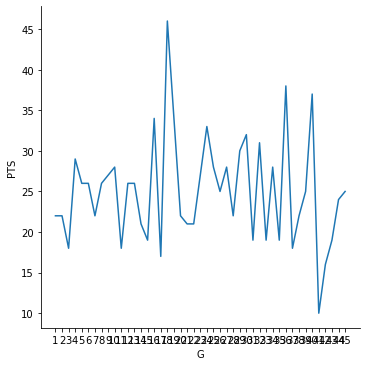

In [84]:
sns.relplot(x="G", y="PTS", data=lebron4, kind="line", ci="sd")

plt.show()

<ipython-input-95-d15e1ca9dbc3>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 45)


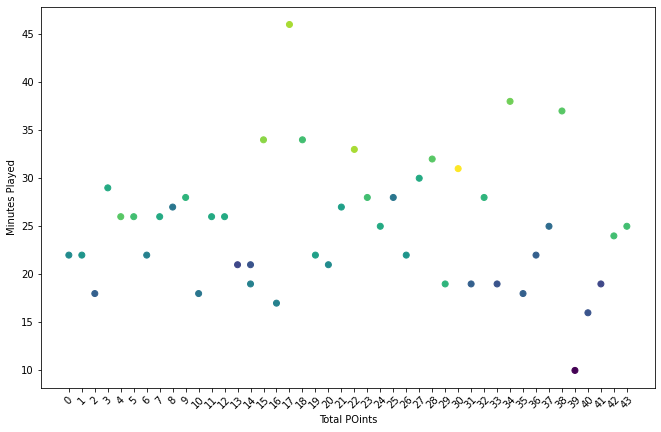

In [95]:
fig, ax = plt.subplots(figsize= (11,7))
ax.scatter(lebron4["MP"], lebron4["PTS"], c=lebron4.FGA)
#plt.figure(figsize=(40, 40))
ax.set_ylabel("Minutes Played")
ax.set_xlabel("Total POints")
ax.set_xticklabels(ax.get_xticks(), rotation = 45)
plt.show()

In [35]:
lebron4.DraftKingTotals.mean()

49.766666666666666

In [36]:
lebron4.PTS.std()

6.665681745426578

In [37]:
print(np.max(lebron4.MP))

46:29


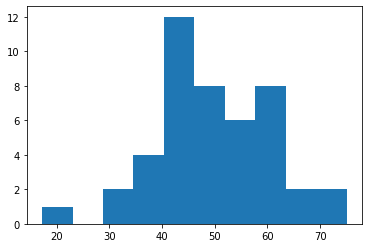

In [38]:
_ = plt.hist(lebron4["DraftKingTotals"], bins=10)

In [84]:
a= "Giannis Antetokounmpo "
b=a.find(" ")
b


7

In [85]:
c=len(a)
c

22

In [86]:
if c-b>5:
    d=a[b+1:b+6]
else:
    d=a[b+1:c]

In [87]:
d

'Antet'

In [88]:
e=a[0:2]
e

'Gi'

In [89]:
f="01"

In [90]:
print((d[0].strip()+'/'+d.strip() + e.strip() + f.strip()).lower())

a/antetgi01
